<a href="https://colab.research.google.com/github/abldvd/FuzzyIrrigation/blob/main/FuzzyIrrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
!pip install scikit-fuzzy

In [156]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

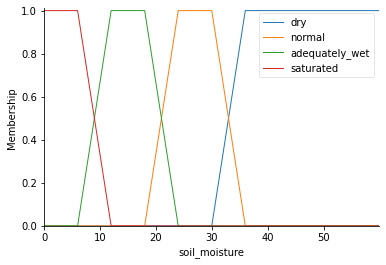

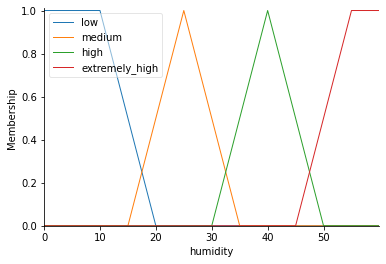

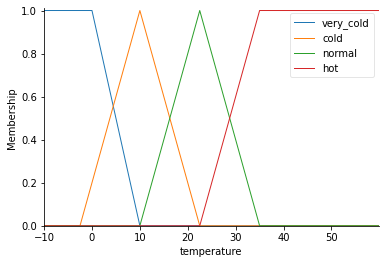

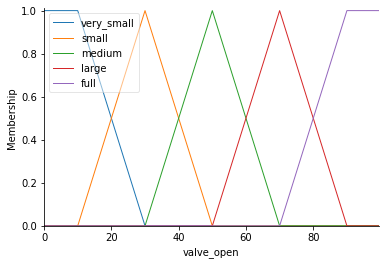

In [203]:
soil_moisture = ctrl.Antecedent(np.arange(0, 60, 0.1), 'soil_moisture')
humidity = ctrl.Antecedent(np.arange(0, 60, 0.1), 'humidity')
temperature = ctrl.Antecedent(np.arange(-10, 60, 0.1), 'temperature')
valve_open = ctrl.Consequent(np.arange(0, 100, 0.5), 'valve_open')

soil_moisture['dry'] = fuzz.trapmf(soil_moisture.universe, [30, 36, 60, 60])
soil_moisture['normal'] = fuzz.trapmf(soil_moisture.universe, [18, 24, 30, 36])
soil_moisture['adequately_wet'] = fuzz.trapmf(soil_moisture.universe, [6, 12, 18, 24])
soil_moisture['saturated'] = fuzz.trapmf(soil_moisture.universe, [0, 0, 6, 12])

humidity['low'] = fuzz.trapmf(humidity.universe, [0, 0, 10, 20])
humidity['medium'] = fuzz.trimf(humidity.universe, [15, 25, 35])
humidity['high'] = fuzz.trimf(humidity.universe, [30, 40, 50])
humidity['extremely_high'] = fuzz.trapmf(humidity.universe, [45, 55, 60, 60])

temperature['very_cold'] = fuzz.trapmf(temperature.universe, [-10, -10, 0, 10])
temperature['cold'] = fuzz.trimf(temperature.universe, [-2.5, 10, 22.5])
temperature['normal'] = fuzz.trimf(temperature.universe, [10, 22.5, 35])
temperature['hot'] = fuzz.trapmf(temperature.universe, [22.5, 35, 60, 60])
 
valve_open['very_small'] = fuzz.trapmf(valve_open.universe, [0, 0, 10, 30])
valve_open['small'] = fuzz.trimf(valve_open.universe, [10, 30, 50])
valve_open['medium'] = fuzz.trimf(valve_open.universe, [30, 50, 70])
valve_open['large'] = fuzz.trimf(valve_open.universe, [50, 70, 90])
valve_open['full'] = fuzz.trapmf(valve_open.universe, [70, 90, 100, 100])

soil_moisture.view()
humidity.view()
temperature.view()
valve_open.view()


In [307]:
rule1 = ctrl.Rule(soil_moisture['dry'] & humidity['low'] & (temperature['hot']|temperature['normal'])
                  , valve_open['full'])

rule2 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) 
                  & (humidity['low']|humidity['medium']) 
                  & (temperature['normal']|temperature['hot'])
                  , valve_open['large'])

rule3 = ctrl.Rule((soil_moisture['adequately_wet']|soil_moisture['saturated']) 
                  & (humidity['low']|humidity['medium']) 
                  & (temperature['normal']|temperature['hot'])
                  , valve_open['medium'])


rule3 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) 
                  & (humidity['high']|humidity['extremely_high']) 
                  & (temperature['normal']|temperature['hot'])
                  , valve_open['large'])

rule4 = ctrl.Rule((soil_moisture['adequately_wet']|soil_moisture['saturated']) 
                  & (humidity['high']|humidity['extremely_high']) 
                  & (temperature['normal']|temperature['hot'])
                  , valve_open['small'])


rule5 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) 
                  & (humidity['low']|humidity['medium']) 
                  & (temperature['cold']|temperature['very_cold'])
                  , valve_open['medium'])

rule6 = ctrl.Rule((soil_moisture['adequately_wet']|soil_moisture['saturated']) 
                  & (humidity['low']|humidity['medium']) 
                  & (temperature['cold']|temperature['very_cold'])
                  , valve_open['small'])


rule7 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) 
                  & (humidity['high']|humidity['extremely_high']) 
                  & (temperature['cold']|temperature['very_cold'])
                  , valve_open['medium'])

rule8 = ctrl.Rule((soil_moisture['adequately_wet']|soil_moisture['saturated']) 
                  & (humidity['high']|humidity['extremely_high']) 
                  & (temperature['cold']|temperature['very_cold'])
                  , valve_open['very_small'])


rule9 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) & humidity['low']
                  , valve_open['large'])

rule10 = ctrl.Rule((soil_moisture['dry']|soil_moisture['normal']) & humidity['extremely_high']
                  , valve_open['medium'])

rule11 = ctrl.Rule((soil_moisture['saturated']|soil_moisture['adequately_wet']) & temperature['hot']
                  , valve_open['small'])

rule12 = ctrl.Rule((soil_moisture['saturated']|soil_moisture['adequately_wet']) & temperature['very_cold']
                  , valve_open['very_small']%50)



irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])
irrigation = ctrl.ControlSystemSimulation(irrigation_ctrl)

54.09302325581402


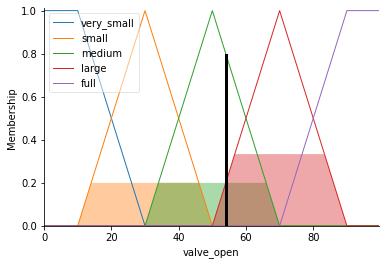

In [323]:
##evaluating
irrigation.input['soil_moisture'] = 20
irrigation.input['humidity'] = 20
irrigation.input['temperature'] = 20

irrigation.compute()

print(irrigation.output['valve_open'])
valve_open.view(sim=irrigation)